In [1]:
# Importe as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import csv
import joblib

In [2]:
# Substitua 'seuarquivo.csv' pelo nome real do seu arquivo
caminho_arquivo = r'C:\Users\55219\OneDrive - Universidade do Estado do Rio de Janeiro\PROJETO DE GRADUAÇÃO\Projeto Novo - Machine Learning\Dados_ConsolidadosV2_excluindo_dados.csv'

# Carregue os dados em um DataFrame do Pandas, especificando a vírgula como separador decimal
df = pd.read_csv(caminho_arquivo, sep=";", encoding='utf-8')

# Exiba as primeiras linhas dos dados para verificar se foram carregados corretamente
df.head()

,Código do Município,Município,Estado,Ano de Referência,Código do Prestador,Prestador,Sigla do Prestador,Abrangência,Tipo de serviço,Natureza jurídica,...,AG024 - Volume de serviço,AG026 - População urbana atendida com abastecimento de água,IN013 - Índice de perdas faturamento,IN022 - Consumo médio percapita de água,IN023 - Índice de atendimento urbano de água,IN049 - Índice de perdas na distribuição,IN050 - Índice bruto de perdas lineares,IN051 - Índice de perdas por ligação,IN052 - Índice de consumo de água,IN053 - Consumo médio de água por economia
0,120001,Acrelândia,AC,2021,12004000,Departamento Estadual de Pavimentação e Saneam...,DEPASA,Regional,Água,Autarquia,...,"20,93",5449.0,"80,59","137,86","73,46","80,59","48,39","1949,54","19,41","14,19"
1,120001,Acrelândia,AC,2020,12004000,Departamento Estadual de Pavimentação e Saneam...,DEPASA,Regional,Água,Autarquia,...,"20,96",5069.0,"72,99","132,67","69,35","72,99","29,39","1238,02","27,01","13,83"
2,120001,Acrelândia,AC,2019,12004000,Departamento Estadual de Pavimentação e Saneam...,DEPASA,Regional,Água,Autarquia,...,"19,96",5132.0,"72,4","131,57","71,3","72,4","28,6","1193,72","27,6","13,72"
3,120001,Acrelândia,AC,2018,12004000,Departamento Estadual de Pavimentação e Saneam...,DEPASA,Regional,Água,Autarquia,...,"19,01",5178.0,"71,43","134,4","73,06","71,43","27,68","1161,35","28,57","14,03"
4,120001,Acrelândia,AC,2017,12004000,Departamento Estadual de Pavimentação e Saneam...,DEPASA,Regional,Água,Autarquia,...,"18,1",5072.0,"71,03","141,4","74,82","71,03","27,34","1183,31","28,97","14,38"


In [3]:
# Lista de colunas a serem excluídas
colunas_a_excluir = [
    'POP_TOT - População total do município do ano de referência (Fonte: IBGE):',
    'POP_URB - População urbana do município do ano de referência (Fonte: IBGE):',
    'AG001 - População total atendida com abastecimento de água',
    'AG004 - Quantidade de ligações ativas de água micromedidas',
    'AG007 - Volume de água tratada em ETAs',
    'AG008 - Volume de água micromedido',
    'AG013 - Quantidade de economias residenciais ativas de água',
    'AG014 - Quantidade de economias ativas de água micromedidas',
    'AG015 - Volume de água tratada por simples desinfecção',
    'AG020 - Volume micromedido nas economias residenciais ativas de água',
    'AG022 - Quantidade de economias residenciais ativas de água micromedidas',
    'AG024 - Volume de serviço',
    'AG026 - População urbana atendida com abastecimento de água',
    'IN022 - Consumo médio percapita de água',
    'IN023 - Índice de atendimento urbano de água',
]

# Excluir as colunas do DataFrame
df_sem_colunas = df.drop(columns=colunas_a_excluir)

# Exibir as colunas que permaneceram no DataFrame resultante
print("Colunas que permaneceram:")
print(df_sem_colunas.columns)

Colunas que permaneceram:
Index(['Código do Município', 'Município', 'Estado', 'Ano de Referência',
       'Código do Prestador', 'Prestador', 'Sigla do Prestador', 'Abrangência',
       'Tipo de serviço', 'Natureza jurídica',
       'AG002 - Quantidade de ligações ativas de água',
       'AG003 - Quantidade de economias ativas de água',
       'AG005 - Extensão da rede de água', 'AG006 - Volume de água produzido',
       'AG010 - Volume de água consumido', 'AG011 - Volume de água faturado',
       'AG012 - Volume de água macromedido',
       'AG021 - Quantidade de ligações totais de água',
       'IN013 - Índice de perdas faturamento',
       'IN049 - Índice de perdas na distribuição',
       'IN050 - Índice bruto de perdas lineares',
       'IN051 - Índice de perdas por ligação',
       'IN052 - Índice de consumo de água',
       'IN053 - Consumo médio de água por economia'],
      dtype='object')


In [12]:
# Lista de colunas que precisam de substituição
colunas_para_substituir = ['AG002 - Quantidade de ligações ativas de água',
       'AG003 - Quantidade de economias ativas de água',
       'AG005 - Extensão da rede de água', 'AG006 - Volume de água produzido',
       'AG010 - Volume de água consumido', 'AG011 - Volume de água faturado',
       'AG012 - Volume de água macromedido',
       'AG021 - Quantidade de ligações totais de água',
       'IN013 - Índice de perdas faturamento',
       'IN049 - Índice de perdas na distribuição',
       'IN050 - Índice bruto de perdas lineares',
       'IN051 - Índice de perdas por ligação',
       'IN052 - Índice de consumo de água',
       'IN053 - Consumo médio de água por economia']


# Substituir vírgulas por pontos em colunas específicas
df_sem_colunas[colunas_para_substituir] = df[colunas_para_substituir].replace(',', '.', regex=True)

# Converter as colunas para o tipo float
df_sem_colunas[colunas_para_substituir] = df[colunas_para_substituir].astype(float)

In [13]:
# Imprimir DataFrame depois da substituição
print("\nDataFrame depois da substituição:")
print(df_sem_colunas[colunas_para_substituir].head())


DataFrame depois da substituição:
   AG002 - Quantidade de ligações ativas de água  \
0                                         1658.0   
1                                         1509.0   
2                                         1520.0   
3                                         1537.0   
4                                         1504.0   

   AG003 - Quantidade de economias ativas de água  \
0                                          1669.0   
1                                          1518.0   
2                                          1535.0   
3                                          1548.0   
4                                          1515.0   

   AG005 - Extensão da rede de água  AG006 - Volume de água produzido  \
0                              63.8                           1419.12   
1                              63.8                            958.61   
2                              63.8                            939.81   
3                              63.8      

In [14]:
#df.info() para obter informações sobre os tipos de dados e ver se há valores nulos.
df_sem_colunas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80304 entries, 0 to 80303
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Código do Município                             80304 non-null  int64  
 1   Município                                       80304 non-null  object 
 2   Estado                                          80304 non-null  object 
 3   Ano de Referência                               80304 non-null  int64  
 4   Código do Prestador                             80304 non-null  int64  
 5   Prestador                                       80304 non-null  object 
 6   Sigla do Prestador                              80304 non-null  object 
 7   Abrangência                                     80304 non-null  object 
 8   Tipo de serviço                                 80304 non-null  object 
 9   Natureza jurídica                      

In [15]:
#df.describe() para obter estatísticas descritivas para colunas numéricas.
df_sem_colunas.describe()

,Código do Município,Ano de Referência,Código do Prestador,AG002 - Quantidade de ligações ativas de água,AG003 - Quantidade de economias ativas de água,AG005 - Extensão da rede de água,AG006 - Volume de água produzido,AG010 - Volume de água consumido,AG011 - Volume de água faturado,AG012 - Volume de água macromedido,AG021 - Quantidade de ligações totais de água,IN013 - Índice de perdas faturamento,IN049 - Índice de perdas na distribuição,IN050 - Índice bruto de perdas lineares,IN051 - Índice de perdas por ligação,IN052 - Índice de consumo de água,IN053 - Consumo médio de água por economia
count,80304.000000,80304.000000,8.030400e+04,8.023900e+04,8.016700e+04,80286.000000,8.027600e+04,8.027600e+04,8.027700e+04,7.944700e+04,7.991200e+04,80304.000000,80304.000000,80304.000000,80260.000000,80304.000000,79448.000000
mean,330131.600605,2012.668858,3.299961e+07,9.917803e+03,1.279676e+04,127.644090,3.214771e+03,2.201643e+03,2.246877e+03,2.856641e+03,1.105917e+04,30.975742,34.806659,24.266678,344.081944,65.190413,12.417962
std,98989.039643,5.474813,9.891513e+06,5.167111e+04,8.405513e+04,483.625984,2.224465e+04,1.821761e+04,1.794497e+04,2.760036e+04,5.816221e+04,22.577177,18.057755,114.018476,4730.636862,18.057798,83.726602
min,110001.000000,1998.000000,1.100011e+07,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-0.080000,0.000000,-60.300000
25%,260500.000000,2008.000000,2.611600e+07,1.135000e+03,1.189000e+03,17.000000,2.200000e+02,1.472675e+02,1.520000e+02,0.000000e+00,1.305000e+03,14.060000,22.440000,6.640000,106.820000,54.050000,9.020000
50%,315670.000000,2013.000000,3.106301e+07,2.452000e+03,2.579000e+03,36.500000,5.149200e+02,3.368800e+02,3.583300e+02,1.830700e+02,2.794000e+03,26.510000,32.500000,12.820000,182.000000,67.500000,10.500000
75%,412545.000000,2017.000000,4.106900e+07,6.190000e+03,6.659000e+03,91.030000,1.466705e+03,9.500000e+02,1.000000e+03,7.547100e+02,6.964000e+03,42.950000,45.942500,26.680000,343.687500,77.560000,12.700000
max,530010.000000,2021.000000,5.300100e+07,3.288392e+06,5.173908e+06,23195.260000,1.383097e+06,1.329177e+06,1.283726e+06,1.376633e+06,3.755238e+06,100.000000,100.000000,28395.150000,863658.340000,100.000000,19666.700000


In [16]:
# Identificar colunas numéricas
numeric_columns = df_sem_colunas.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)

Index(['Código do Município', 'Ano de Referência', 'Código do Prestador',
       'AG002 - Quantidade de ligações ativas de água',
       'AG003 - Quantidade de economias ativas de água',
       'AG005 - Extensão da rede de água', 'AG006 - Volume de água produzido',
       'AG010 - Volume de água consumido', 'AG011 - Volume de água faturado',
       'AG012 - Volume de água macromedido',
       'AG021 - Quantidade de ligações totais de água',
       'IN013 - Índice de perdas faturamento',
       'IN049 - Índice de perdas na distribuição',
       'IN050 - Índice bruto de perdas lineares',
       'IN051 - Índice de perdas por ligação',
       'IN052 - Índice de consumo de água',
       'IN053 - Consumo médio de água por economia'],
      dtype='object')


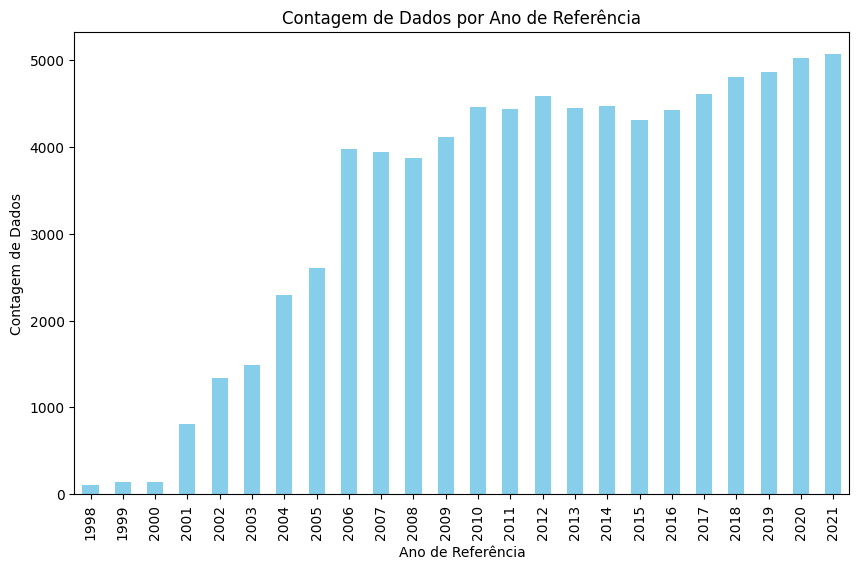

In [17]:
# Contagem de dados por ano
contagem_por_ano = df_sem_colunas['Ano de Referência'].value_counts().sort_index()

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
contagem_por_ano.plot(kind='bar', color='skyblue')
plt.title('Contagem de Dados por Ano de Referência')
plt.xlabel('Ano de Referência')
plt.ylabel('Contagem de Dados')
plt.show()

In [19]:
# Filtrar o DataFrame para incluir apenas dados a partir de 2006
df_a_partir_de_2006 = df_sem_colunas[df_sem_colunas['Ano de Referência'] >= 2006]

# Contar o número de linhas no novo DataFrame
quantidade_de_dados = len(df_a_partir_de_2006)

print(f'Quantidade de dados a partir de 2006: {quantidade_de_dados}')

Quantidade de dados a partir de 2006: 71392


C:\Users\55219\AppData\Local\Temp\ipykernel_23384\4140567103.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Média', y='Estado', data=estatisticas_df, ci='sd', palette='viridis')


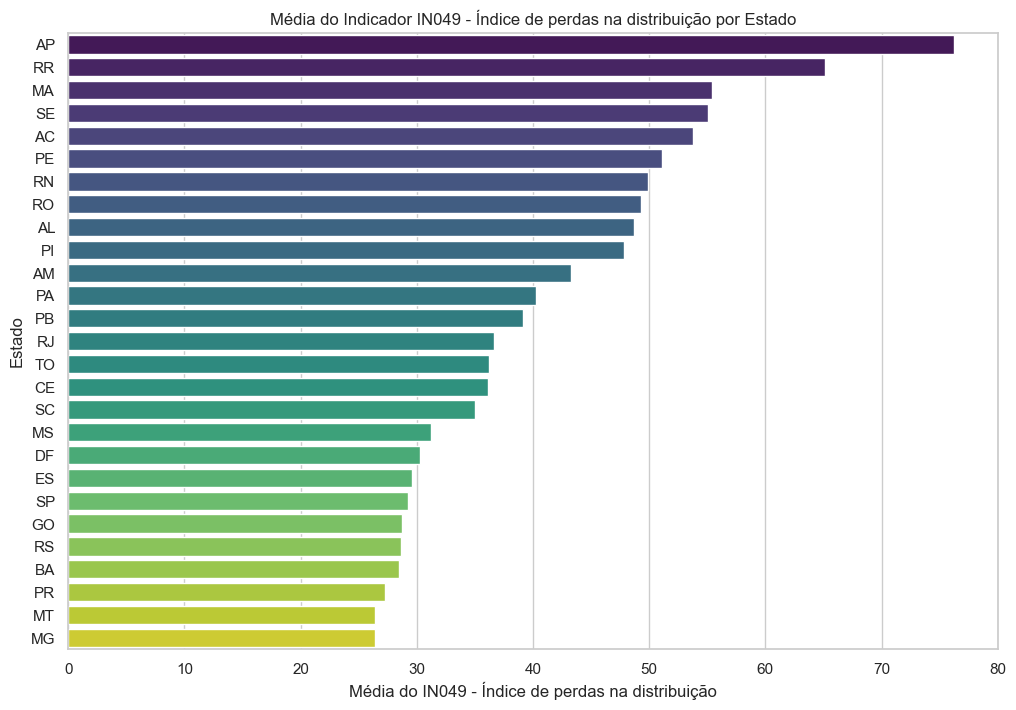

In [21]:
# Especificar o nome da coluna do indicador desejado
coluna_indicador = 'IN049 - Índice de perdas na distribuição'

# Filtrar o DataFrame para o indicador desejado e a partir de 2006
df_a_partir_de_2006 = df_sem_colunas[df_sem_colunas['Ano de Referência'] >= 2006]
df_indicador = df_a_partir_de_2006[['Estado', coluna_indicador]]

# Calcular estatísticas descritivas para o indicador IN049 por estado
estados = df_indicador['Estado'].unique()

# Inicializar uma lista para armazenar as estatísticas
estatisticas_lista = []

for estado in estados:
    df_estado = df_indicador[df_indicador['Estado'] == estado]
    
    # Calcular estatísticas descritivas
    media = df_estado[coluna_indicador].mean()
    mediana = df_estado[coluna_indicador].median()
    desvio_padrao = df_estado[coluna_indicador].std()
    
    # Adicionar as estatísticas à lista
    estatisticas_lista.append({'Estado': estado, 'Média': media, 'Mediana': mediana, 'Desvio Padrão': desvio_padrao})

# Criar um DataFrame a partir da lista de dicionários
estatisticas_df = pd.DataFrame(estatisticas_lista)

# Ordenar o DataFrame por média para facilitar a visualização
estatisticas_df = estatisticas_df.sort_values(by='Média', ascending=False)

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar um gráfico de barras com intervalos de confiança
plt.figure(figsize=(12, 8))
sns.barplot(x='Média', y='Estado', data=estatisticas_df, ci='sd', palette='viridis')

# Adicionar rótulos e título
plt.title(f'Média do Indicador {coluna_indicador} por Estado')
plt.xlabel(f'Média do {coluna_indicador}')
plt.ylabel('Estado')

# Exibir o gráfico
plt.show()

C:\Users\55219\AppData\Local\Temp\ipykernel_23384\1990485764.py:58: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.lineplot(x='Ano de Referência', y=coluna_indicador, hue='Estado', data=df_regiao, palette=cores_distintas, marker='o')


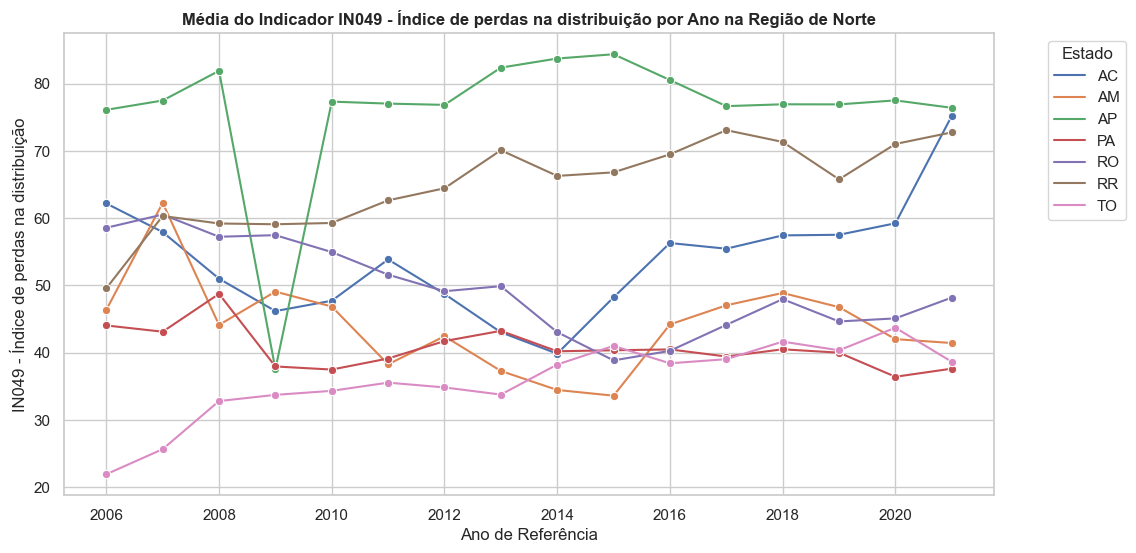

C:\Users\55219\AppData\Local\Temp\ipykernel_23384\1990485764.py:58: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.lineplot(x='Ano de Referência', y=coluna_indicador, hue='Estado', data=df_regiao, palette=cores_distintas, marker='o')


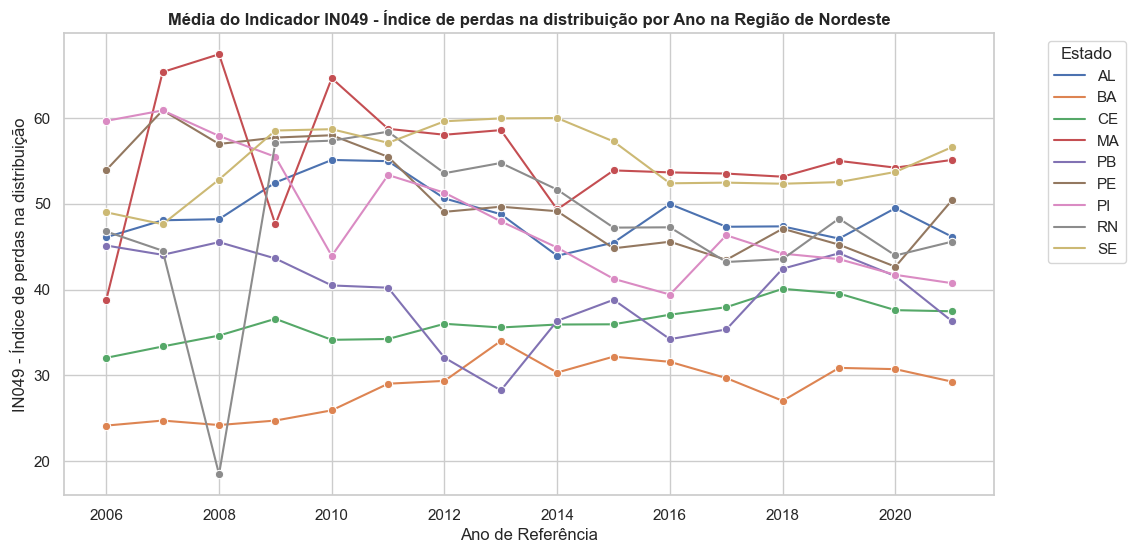

C:\Users\55219\AppData\Local\Temp\ipykernel_23384\1990485764.py:58: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(x='Ano de Referência', y=coluna_indicador, hue='Estado', data=df_regiao, palette=cores_distintas, marker='o')


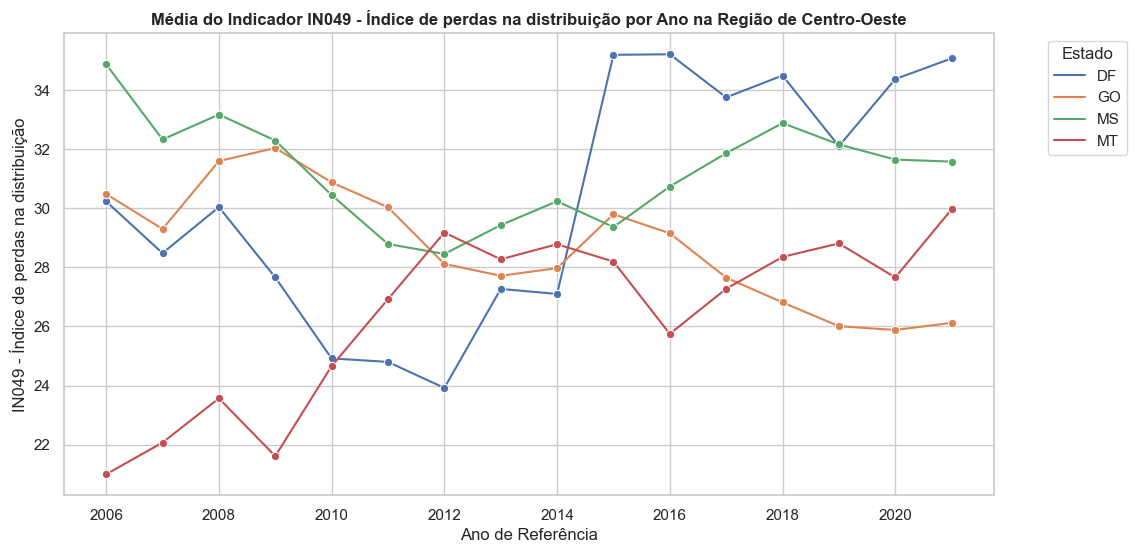

C:\Users\55219\AppData\Local\Temp\ipykernel_23384\1990485764.py:58: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(x='Ano de Referência', y=coluna_indicador, hue='Estado', data=df_regiao, palette=cores_distintas, marker='o')


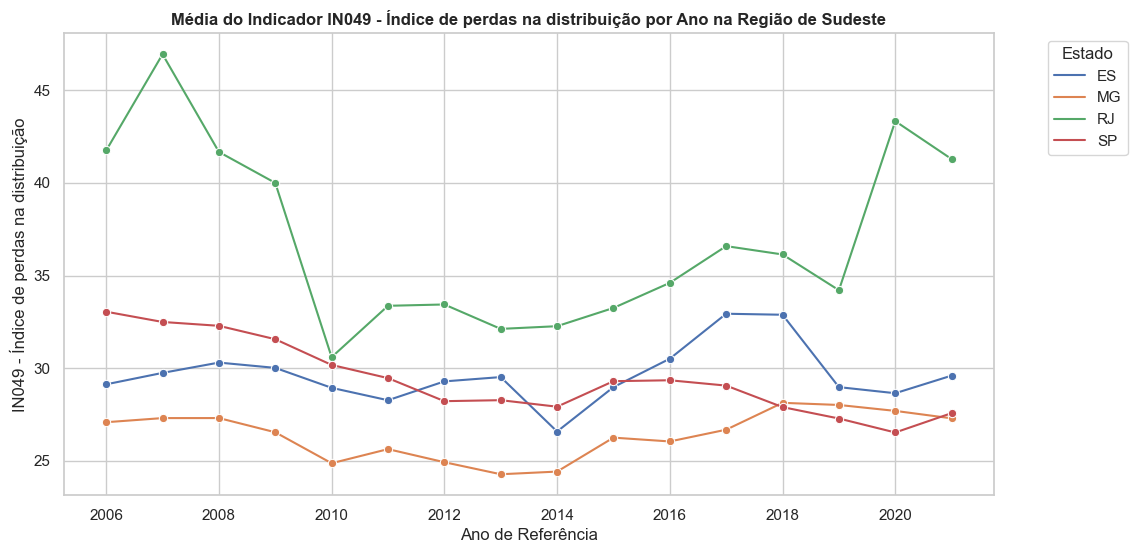

C:\Users\55219\AppData\Local\Temp\ipykernel_23384\1990485764.py:58: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(x='Ano de Referência', y=coluna_indicador, hue='Estado', data=df_regiao, palette=cores_distintas, marker='o')


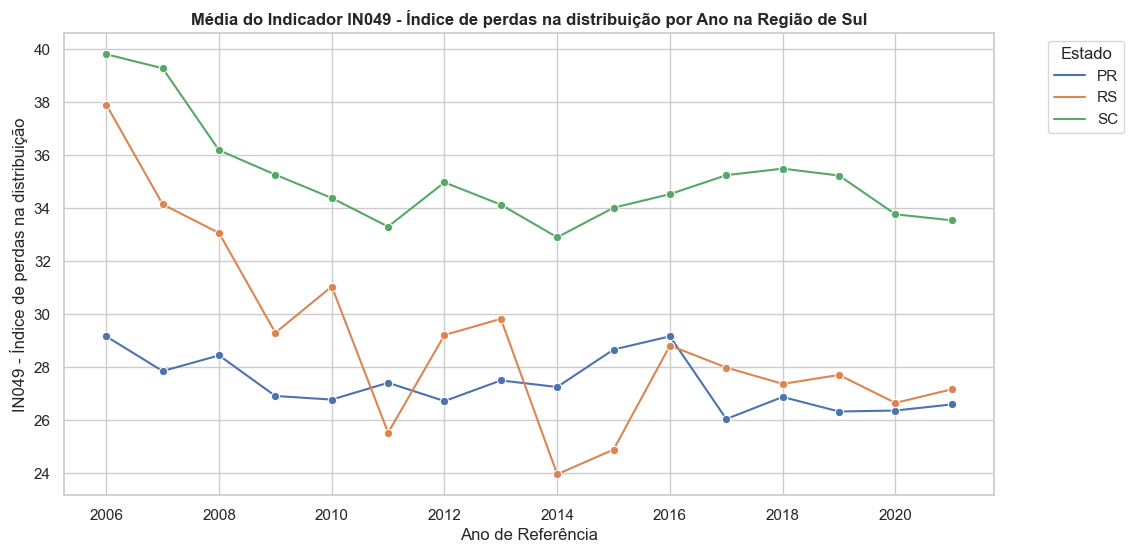

In [22]:
# Mapear estados para regiões
mapeamento_regioes = {
    'AC': 'Norte',
    'AL': 'Nordeste',
    'AP': 'Norte',
    'AM': 'Norte',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'DF': 'Centro-Oeste',
    'ES': 'Sudeste',
    'GO': 'Centro-Oeste',
    'MA': 'Nordeste',
    'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste',
    'MG': 'Sudeste',
    'PA': 'Norte',
    'PB': 'Nordeste',
    'PR': 'Sul',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'RJ': 'Sudeste',
    'RN': 'Nordeste',
    'RS': 'Sul',
    'RO': 'Norte',
    'RR': 'Norte',
    'SC': 'Sul',
    'SP': 'Sudeste',
    'SE': 'Nordeste',
    'TO': 'Norte',
}

# Criar a coluna 'Região' com base no mapeamento
df_sem_colunas['Região'] = df_sem_colunas['Estado'].map(mapeamento_regioes)

# Filtrar o DataFrame para o indicador desejado e a partir de 2006
df_a_partir_de_2006 = df_sem_colunas[df_sem_colunas['Ano de Referência'] >= 2006]

# Filtrar o DataFrame para o indicador desejado
df_indicador = df_a_partir_de_2006[['Estado', 'Região', 'Ano de Referência', coluna_indicador]]

# Calcular as médias para cada ano, estado e região
df_media = df_indicador.groupby(['Estado', 'Região', 'Ano de Referência'])[coluna_indicador].mean().reset_index()

# Configurar subplots para cada região
regioes = df_media['Região'].unique()
num_regioes = len(regioes)

# Usar uma paleta de cores mais distinta
cores_distintas = sns.color_palette()

# Iterar sobre as regiões e plotar gráficos separados
for regiao in regioes:
    df_regiao = df_media[df_media['Região'] == regiao]
    
    plt.figure(figsize=(12, 6))
    
    # Plotar gráfico de linha para a região específica
    sns.lineplot(x='Ano de Referência', y=coluna_indicador, hue='Estado', data=df_regiao, palette=cores_distintas, marker='o')
    
    # Adicionar rótulos e título
    plt.title(f'Média do Indicador {coluna_indicador} por Ano na Região de {regiao}', fontweight='bold')
    plt.xlabel('Ano de Referência')
    plt.ylabel(coluna_indicador)
    
    # Adicionar legenda
    plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Exibir o gráfico
    plt.show()

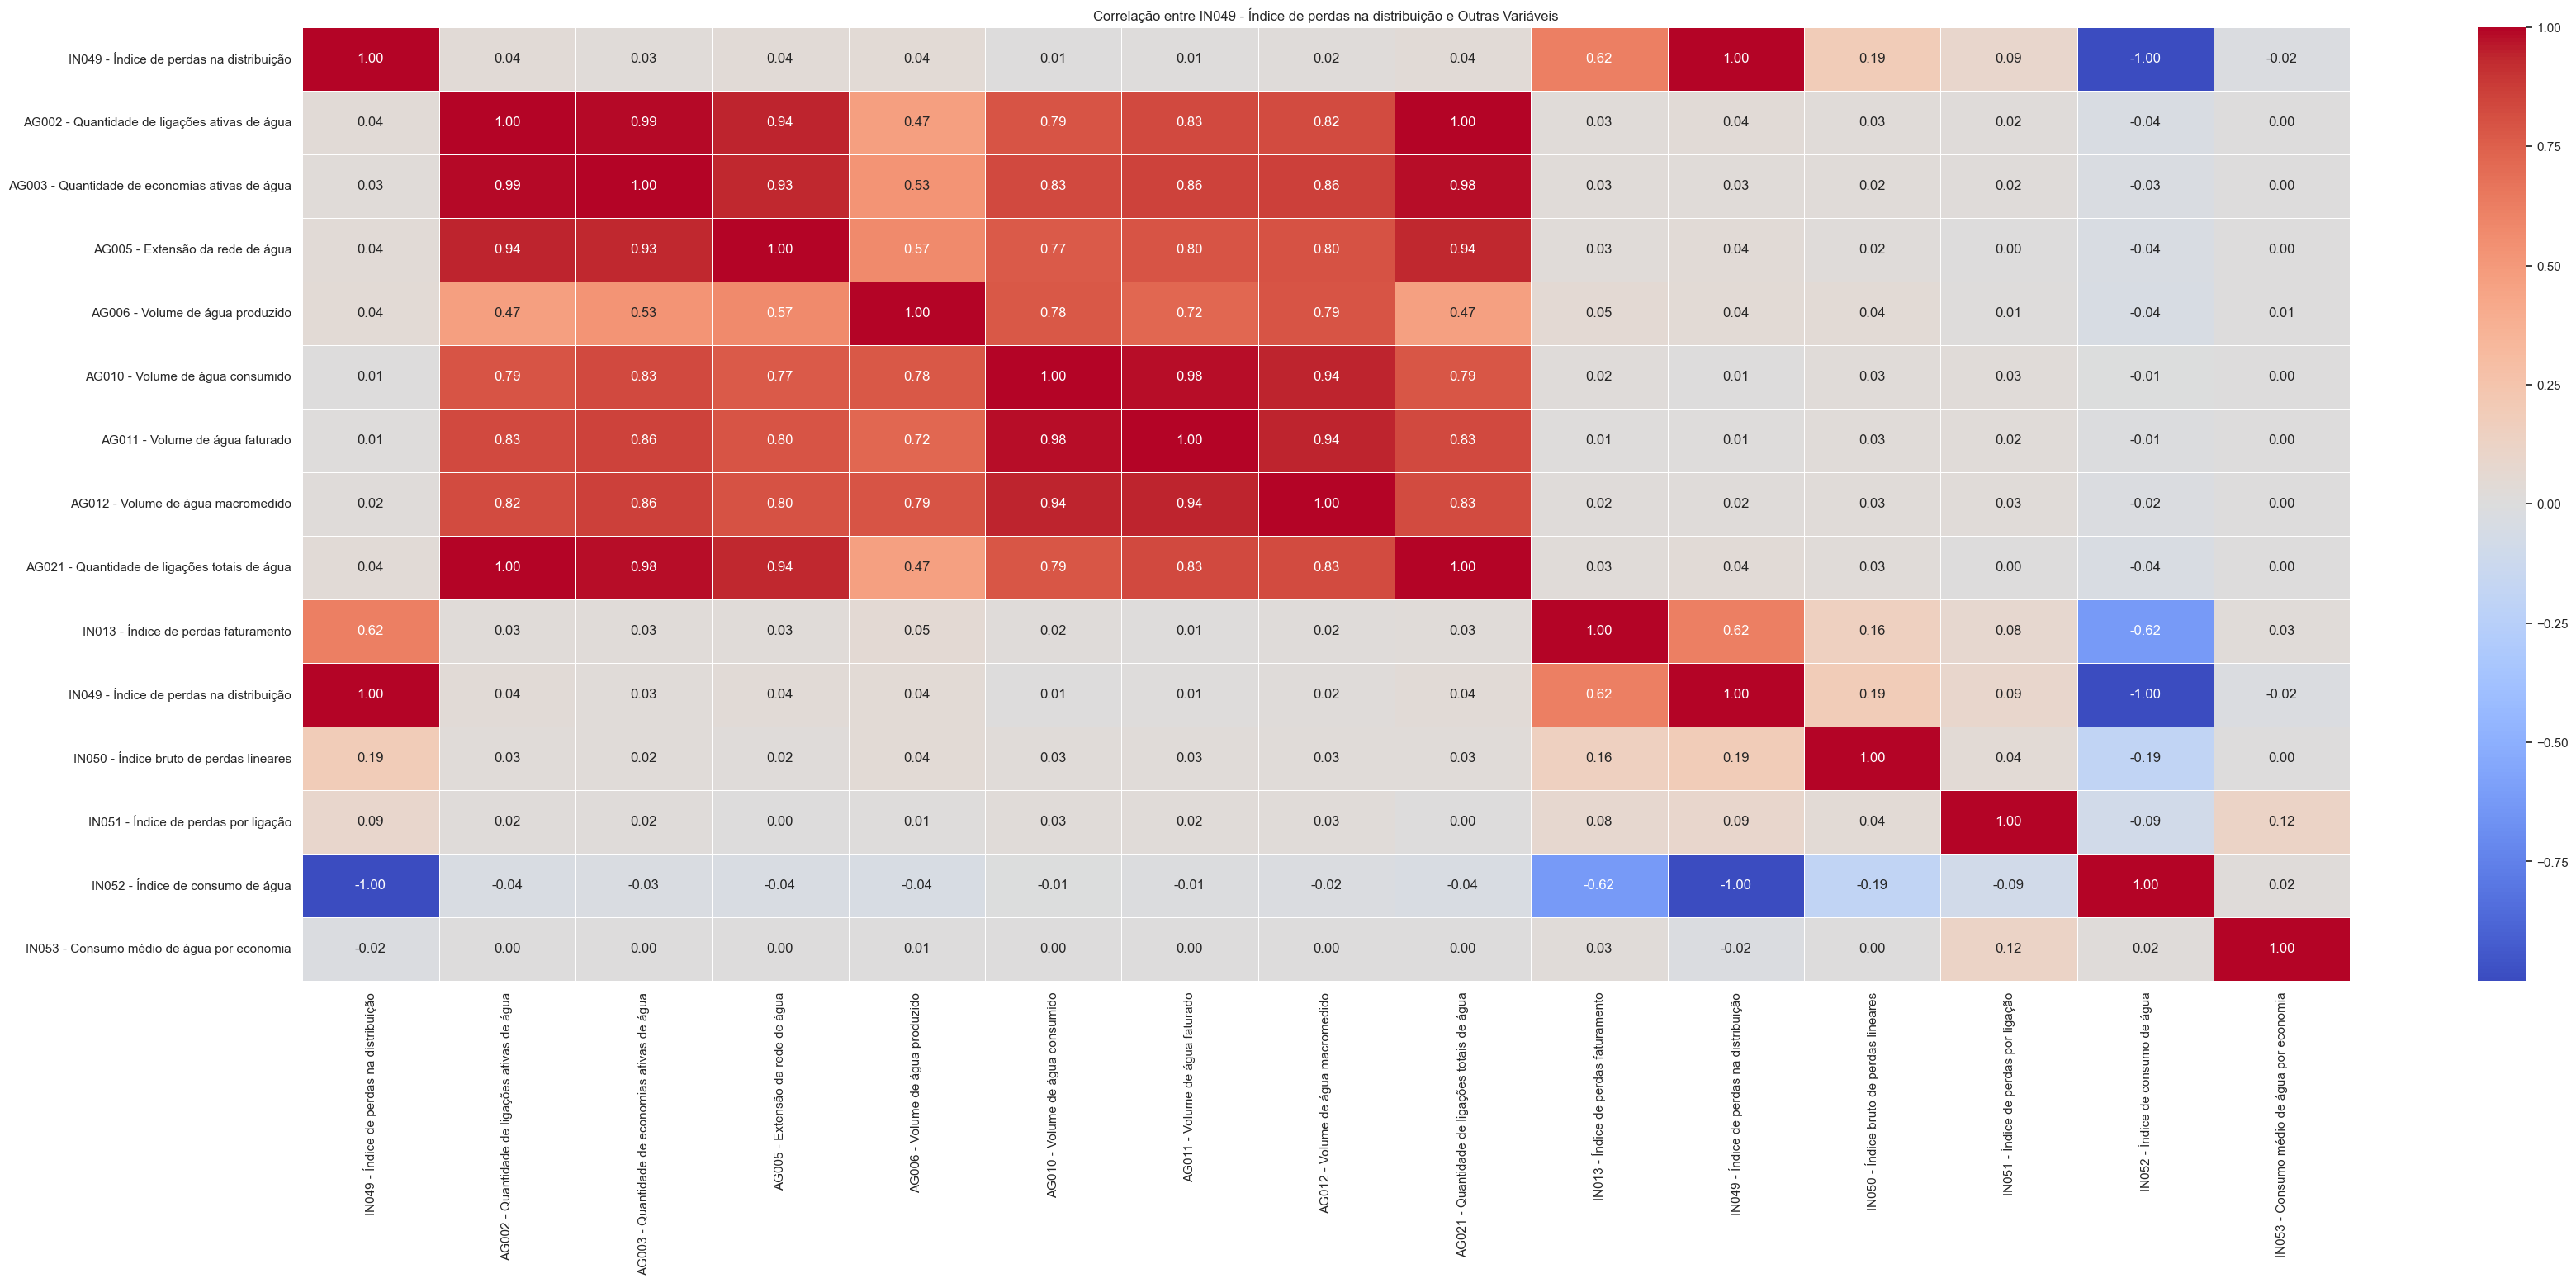

In [24]:
import seaborn as sns

# Especificar o indicador desejado
indicador_alvo = 'IN049 - Índice de perdas na distribuição'

# Filtrar o DataFrame para dados a partir de 2006
df_a_partir_de_2006 = df_sem_colunas[df_sem_colunas['Ano de Referência'] >= 2006]

# Selecionar as variáveis para a correlação
variaveis_correlacionadas = [
                           'AG002 - Quantidade de ligações ativas de água',
                           'AG003 - Quantidade de economias ativas de água',
                           'AG005 - Extensão da rede de água',
                           'AG006 - Volume de água produzido',
                           'AG010 - Volume de água consumido',
                           'AG011 - Volume de água faturado',
                           'AG012 - Volume de água macromedido',
                           'AG021 - Quantidade de ligações totais de água',
                           'IN013 - Índice de perdas faturamento',
                           'IN049 - Índice de perdas na distribuição',
                           'IN050 - Índice bruto de perdas lineares',
                           'IN051 - Índice de perdas por ligação',
                           'IN052 - Índice de consumo de água',	
                           'IN053 - Consumo médio de água por economia']

# Criar um novo DataFrame apenas com as variáveis de interesse
df_correlacao = df_sem_colunas[[indicador_alvo] + variaveis_correlacionadas]

# Calcular a matriz de correlação
matriz_correlacao = df_correlacao.corr()

# Plotar um mapa de calor da matriz de correlação
plt.figure(figsize=(40, 15))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Correlação entre {indicador_alvo} e Outras Variáveis')
plt.show()

In [25]:
# Verificar quais colunas possuem valores vazios e quantos em cada coluna
valores_vazios_por_coluna = df_sem_colunas.isnull().sum()

# Exibir o resultado
print(valores_vazios_por_coluna)

Código do Município                                 0
Município                                           0
Estado                                              0
Ano de Referência                                   0
Código do Prestador                                 0
Prestador                                           0
Sigla do Prestador                                  0
Abrangência                                         0
Tipo de serviço                                     0
Natureza jurídica                                   0
AG002 - Quantidade de ligações ativas de água      65
AG003 - Quantidade de economias ativas de água    137
AG005 - Extensão da rede de água                   18
AG006 - Volume de água produzido                   28
AG010 - Volume de água consumido                   28
AG011 - Volume de água faturado                    27
AG012 - Volume de água macromedido                857
AG021 - Quantidade de ligações totais de água     392
IN013 - Índice de perdas fat

In [26]:
# Verificar quais linhas contêm valores NaN no conjunto de dados
linhas_com_nan = df_sem_colunas[variaveis_correlacionadas].isnull().any(axis=1)

# Mostrar as linhas que contêm valores NaN
linhas_nan_indices = linhas_com_nan[linhas_com_nan].index
print(f"Linhas com valores NaN:\n{linhas_nan_indices}")

# Contar o número de linhas com valores NaN
numero_de_linhas_nan = df_sem_colunas[variaveis_correlacionadas].isnull().any(axis=1).sum()

print(f"Número de linhas com valores NaN: {numero_de_linhas_nan}")

# Contar o número de linhas com valores NaN
numero_de_linhas_nan = df_sem_colunas[variaveis_correlacionadas].isnull().any(axis=1).sum()

print(f"Número de linhas com valores NaN: {numero_de_linhas_nan}")

# Adicionar uma coluna indicando se a linha contém valores NaN
df_sem_colunas['Linhas_com_NaN'] = df_sem_colunas[variaveis_correlacionadas].isnull().any(axis=1)

# Contar o número de linhas com valores NaN para cada estado
contagem_nan_por_estado = df_sem_colunas.groupby('Estado')['Linhas_com_NaN'].sum()

print("Número de linhas com valores NaN por estado:")
print(contagem_nan_por_estado)

# Contar o total de linhas para cada estado
total_linhas_por_estado = df_sem_colunas['Estado'].value_counts()

print("Total de linhas por estado:")
print(total_linhas_por_estado)

Linhas com valores NaN:
Index([   57,    78,   141,   162,   233,   255,   361,   382,   403,   424,
       ...
       80195, 80223, 80224, 80243, 80244, 80250, 80266, 80284, 80285, 80303],
      dtype='int64', length=1935)
Número de linhas com valores NaN: 1935
Número de linhas com valores NaN: 1935
Número de linhas com valores NaN por estado:
Estado
AC     10
AL     30
AM     11
AP     29
BA     37
CE     47
DF      0
ES    121
GO     14
MA     58
MG    184
MS      5
MT     68
PA     32
PB    150
PE      3
PI     20
PR    337
RJ     61
RN    175
RO     37
RR      1
RS    104
SC     24
SE     11
SP    188
TO    178
Name: Linhas_com_NaN, dtype: int64
Total de linhas por estado:
Estado
MG    13295
SP     9011
RS     7407
PR     5822
BA     4911
SC     4422
GO     4226
MA     3043
PI     2904
PB     2763
PE     2750
CE     2280
RN     2153
TO     2078
MT     1817
RJ     1743
PA     1664
AL     1576
MS     1435
SE     1381
ES     1192
RO      875
AM      497
AC      426
AP      312
RR    

In [27]:
# Excluir linhas com valores NaN nas variáveis correlacionadas
df_sem_nan = df_sem_colunas.dropna(subset=variaveis_correlacionadas)

# Verificar o novo número de linhas no DataFrame
numero_de_linhas_sem_nan = len(df_sem_nan)

print(f"Número de linhas após excluir valores NaN: {numero_de_linhas_sem_nan}")

Número de linhas após excluir valores NaN: 78369


In [ ]:
import io
import re

caminho_arquivo = 'Dados_ConsolidadosV2_excluindo_dados.csv'

# Ler o conteúdo do arquivo
with open(caminho_arquivo, 'r', encoding='utf-8') as file:
    conteudo = file.read()

# Substituir ponto e vírgula por outro caractere ou string
conteudo_corrigido = re.sub(r';', '|', conteudo)

# Criar um objeto StringIO para simular um arquivo e ler o CSV
df = pd.read_csv(io.StringIO(conteudo_corrigido), sep='|')

# Imprimir as primeiras linhas do DataFrame
print(df.head())


In [ ]:
import pandas as pd
import io
import re

caminho_arquivo = 'Dados_ConsolidadosV2_excluindo_dados.csv'

# Ler o conteúdo do arquivo
with open(caminho_arquivo, 'r', encoding='utf-8') as file:
    conteudo = file.read()

# Substituir ponto e vírgula por outro caractere ou string
conteudo_corrigido = re.sub(r';', '|', conteudo)

# Imprimir o conteúdo corrigido antes de ler o DataFrame
print(conteudo_corrigido)

# Criar um objeto StringIO para simular um arquivo e ler o CSV
df = pd.read_csv(io.StringIO(conteudo_corrigido), sep='|')

# Imprimir as primeiras linhas do DataFrame
print(df.head())

In [ ]:
import pandas as pd
import io
import re

# Substitua 'seu_dataframe.csv' pelo caminho real do seu conjunto de dados
caminho_arquivo = 'Dados_ConsolidadosV2_excluindo_dados.csv'

# Ler o conteúdo do arquivo
with open(caminho_arquivo, 'r', encoding='utf-8') as file:
    conteudo = file.read()

# Substituir ponto e vírgula por outro caractere ou string
conteudo_corrigido = re.sub(r';', '|', conteudo)

# Criar um objeto StringIO para simular um arquivo e ler o CSV
df = pd.read_csv(io.StringIO(conteudo_corrigido), sep='|')

# Selecionar colunas de interesse
colunas_interesse = ['Estado', 'Ano de Referência', 'IN049 - Índice de perdas na distribuição']
df_interesse = df[colunas_interesse]

# Verificar valores ausentes no conjunto de dados de interesse
valores_ausentes_interesse = df_interesse.isnull().sum()

# Exibir contagem de valores ausentes por coluna
print(valores_ausentes_interesse)

In [ ]:
# Selecionar apenas colunas numéricas
colunas_numericas = df.select_dtypes(include=['object']).columns

# Substituir vírgulas por pontos nas colunas numéricas
df[colunas_numericas] = df[colunas_numericas].replace(',', '.', regex=True)

# Converter as colunas numéricas para tipo float
df[colunas_numericas] = df[colunas_numericas].apply(pd.to_numeric, errors='coerce')

# Substituir NaN pela média das colunas numéricas
df[colunas_numericas] = df[colunas_numericas].fillna(df[colunas_numericas].mean())

# Separar as variáveis independentes (X) e a variável dependente (y)
variaveis_correlacionadas = [
    'IN013 - Índice de perdas faturamento',
    'IN022 - Consumo médio percapita de água',
    'IN023 - Índice de atendimento urbano de água',
    'IN050 - Índice bruto de perdas lineares'
]
X = df[variaveis_correlacionadas]
y = df['IN049 - Índice de perdas na distribuição']

# Dividir o conjunto de dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o modelo de regressão linear
modelo_regressao = LinearRegression()

# Treinar o modelo
modelo_regressao.fit(X_treino, y_treino)

# Fazer previsões no conjunto de teste
y_pred = modelo_regressao.predict(X_teste)

# Avaliar o desempenho do modelo
erro_medio_quadratico = mean_squared_error(y_teste, y_pred)
print(f'Erro Médio Quadrático: {erro_medio_quadratico}')

In [ ]:
# Dividir o conjunto de dados em treino e teste
df_treino2, df_teste2 = train_test_split(df, test_size=0.2, random_state=42)

# Restante do seu código para salvar os conjuntos de treino e teste
import os

# Caminho para o diretório desejado
diretorio = r'C:\Users\55219\Google Drive\UERJ\PROJETO DE GRADUAÇÃO'

# Verifica se o diretório existe, caso contrário, cria
if not os.path.exists(diretorio):
    os.makedirs(diretorio)

# Verifica se o DataFrame de treino está preenchido
if not df_treino2.empty:
    # Salva o conjunto de treino
    df_treino2_path = os.path.join(diretorio, 'conjunto_treino2.csv')
    df_treino2.to_csv(df_treino2_path, index=False)
    print(f"Conjunto de treino salvo em: {df_treino2_path}")
else:
    print("O conjunto de treino está vazio.")

# Verifica se o DataFrame de teste está preenchido
if not df_teste2.empty:
    # Salva o conjunto de teste
    df_teste2_path = os.path.join(diretorio, 'conjunto_teste2.csv')
    df_teste2.to_csv(df_teste2_path, index=False)
    print(f"Conjunto de teste salvo em: {df_teste2_path}")
else:
    print("O conjunto de teste está vazio.")

In [ ]:
# Substitua 'seu_dataframe_treino.csv' e 'seu_dataframe_teste.csv' pelos caminhos reais dos seus conjuntos de treino e teste
caminho_treino = r'C:\Users\55219\OneDrive - Universidade do Estado do Rio de Janeiro\PROJETO DE GRADUAÇÃO\Projeto Novo - Machine Learning\conjunto_treino2.csv'
df_treino2 = pd.read_csv(caminho_treino, encoding='utf-8')

caminho_teste = r'C:\Users\55219\OneDrive - Universidade do Estado do Rio de Janeiro\PROJETO DE GRADUAÇÃO\Projeto Novo - Machine Learning\conjunto_teste2.csv'
df_teste2 = pd.read_csv(caminho_teste, encoding='utf-8')

In [ ]:
# Substitua 'IN049' pelo nome real da coluna alvo
y = df_treino2['IN049 - Índice de perdas na distribuição']

# Supondo que você deseja usar todas as outras colunas como features
X = df_treino2.drop('IN049 - Índice de perdas na distribuição', axis=1)

# Dividir os dados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o modelo de regressão linear
modelo_regressao = LinearRegression()

# Treinar o modelo
modelo_regressao.fit(X_treino, y_treino)

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = modelo_regressao.predict(X_teste)

In [ ]:
from sklearn.metrics import mean_squared_error

erro_medio_quadratico = mean_squared_error(y_teste, y_pred)
print(f'Erro Médio Quadrático: {erro_medio_quadratico}')

In [ ]:
# Substitua 'modelo_regressao.pkl' pelo nome desejado para o arquivo
joblib.dump(modelo_regressao, 'Modelo salvo2')

# Caminho para o arquivo CSV
caminho_arquivo = 'C:\\Users\\55219\\OneDrive - Universidade do Estado do Rio de Janeiro\\PROJETO DE GRADUAÇÃO\\Projeto Novo - Machine Learning\\ConsolidadeGeral_v2.csv'

# Carregando o DataFrame a partir do arquivo CSV
df = pd.read_csv(caminho_arquivo, sep=';')

# Listando as colunas que terminam com "_0" e "_1"
cols_0 = [col for col in df.columns if col.endswith("_0")]
cols_1 = [col for col in df.columns if col.endswith("_1")]

# Função para preencher os valores faltantes nas colunas _0 com os valores correspondentes das colunas _1
def preencher_valores(row):
    for col_0, col_1 in zip(cols_0, cols_1):
        if pd.isnull(row[col_0]):
            ano, mun, uf = row['ano_1'], row['Mun'], row['UF']
            valor_correspondente = df[(df['ano_1'] == ano) & (df['Mun'] == mun) & (df['UF'] == uf)][col_1].values
            if len(valor_correspondente) > 0:
                row[col_0] = valor_correspondente[0]
    return row

# Aplicando a função em cada linha do DataFrame
df = df.apply(preencher_valores, axis=1)

# Verificando se as colunas foram preenchidas corretamente
print(df.head())